In [1]:
#!pip3 install albumentations

In [2]:
# Initialized Logger
import torch
import torch.optim as optim
from torchvision import datasets
import albumentations as A
from torchsummary import summary
from src.model import Net
from src.utils import get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class
from src.dataset import dataset_stats,\
                        visualize_images,\
                        visualize_augmentated_images,\
                        AlbumentationImageDataset

CODE BLOCK: 2

In [3]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

INFO:src.utils:device: cuda


Available Device ::  cuda


CODE BLOCK: 3

In [4]:
sample = datasets.CIFAR10('./data',train=True,download=True)
sample_data = sample.data

mean,std,var = dataset_stats(sample_data)
print(f"SHAPE of Images {sample_data.shape}")
print(f"MEAN of dataset {mean}")
print(f"STD of dataset {std}")
print(f"VAR of dataset {var}")

Files already downloaded and verified
SHAPE of Images (50000, 32, 32, 3)
MEAN of dataset [0.49139968 0.48215841 0.44653091]
STD of dataset [0.24703223 0.24348513 0.26158784]
VAR of dataset [15.56135559 15.11767693 17.44919073]


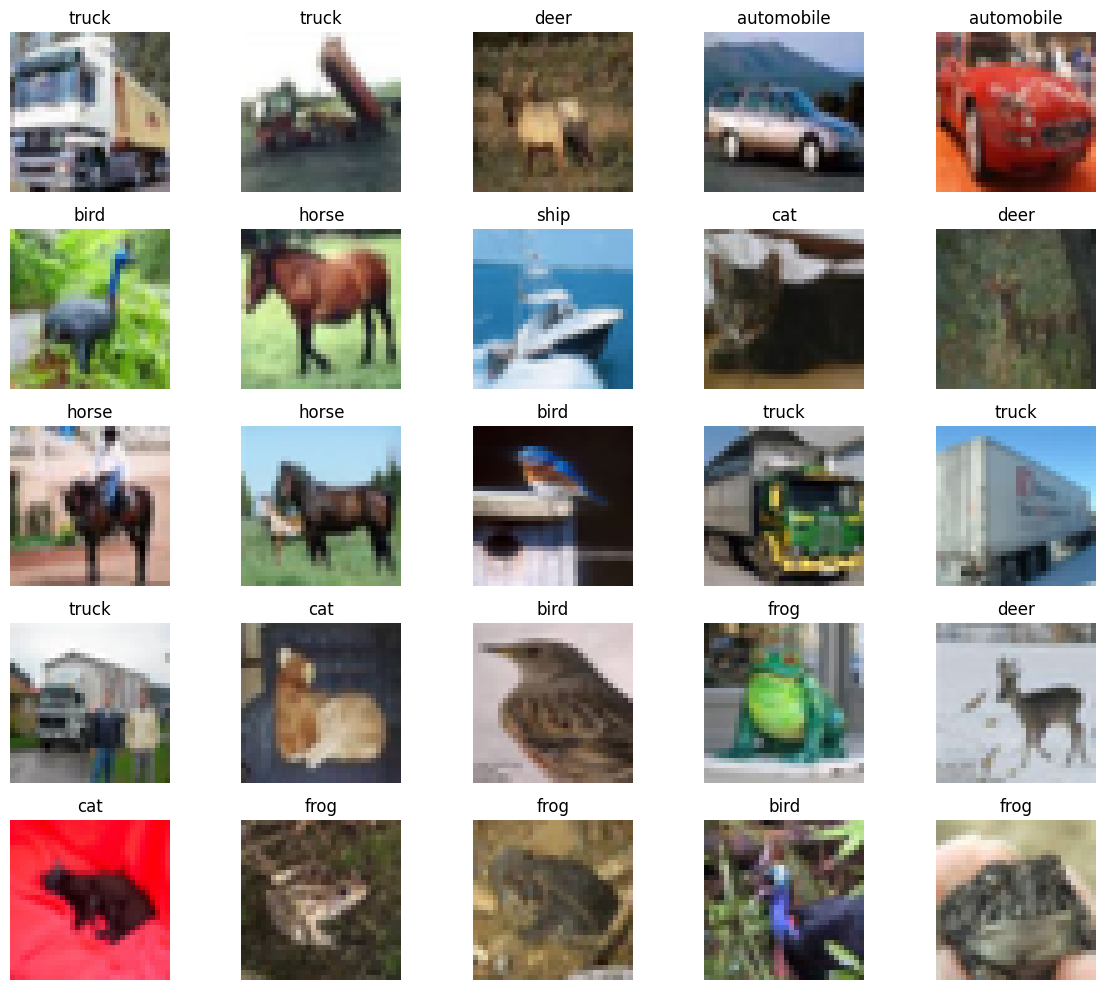

In [5]:
visualize_images(sample,(5,5))

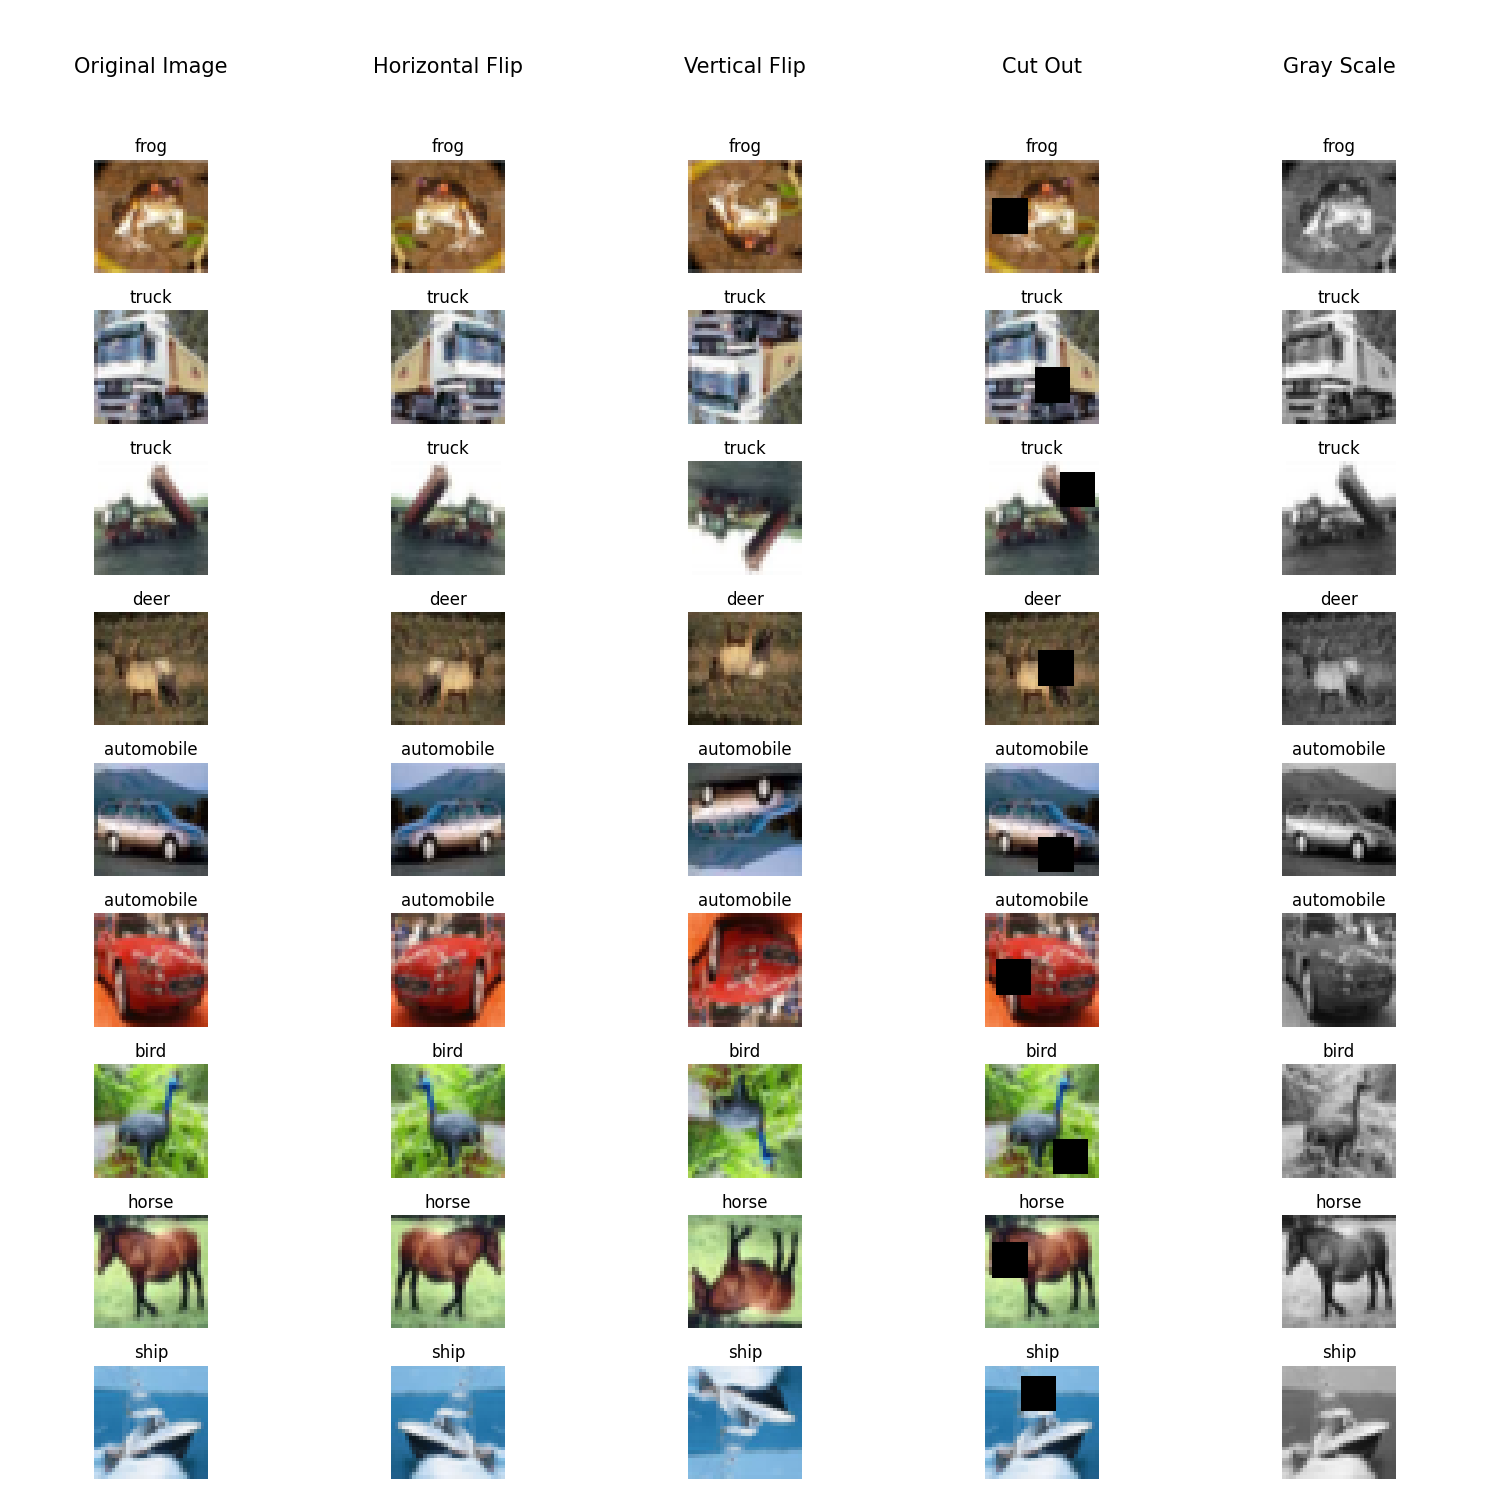

In [6]:
aug_details = {
    'Original Image': None,
    'Horizontal Flip': A.HorizontalFlip(always_apply=True),
    'Vertical Flip': A.VerticalFlip(always_apply=True),
    'Cut Out': A.CoarseDropout(max_holes=1, max_height=10, max_width=10, min_holes=1, min_height=10,
                               min_width=10, fill_value=0.473363, mask_fill_value=None, always_apply=True),
    'Gray Scale': A.ToGray(always_apply=True)
}

visualize_augmentated_images(sample,aug_details)

In [7]:
train_data = datasets.CIFAR10(root='./data', train=True,
                                        download=True )
test_data = datasets.CIFAR10(root='./data', train=False,
                                       download=True)


train_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(train_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=True), batch_size=128,
                                          shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(test_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=False), batch_size=128,
                                          shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
model = Net(norm_type="bn").to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 32, 32]             270
              ReLU-2           [-1, 10, 32, 32]               0
       BatchNorm2d-3           [-1, 10, 32, 32]              20
           Dropout-4           [-1, 10, 32, 32]               0
            Conv2d-5           [-1, 20, 32, 32]           1,800
              ReLU-6           [-1, 20, 32, 32]               0
       BatchNorm2d-7           [-1, 20, 32, 32]              40
           Dropout-8           [-1, 20, 32, 32]               0
            Conv2d-9           [-1, 10, 34, 34]             200
             ReLU-10           [-1, 10, 34, 34]               0
      BatchNorm2d-11           [-1, 10, 34, 34]              20
          Dropout-12           [-1, 10, 34, 34]               0
        MaxPool2d-13           [-1, 10, 17, 17]               0
           Conv2d-14           [-1, 20,

In [9]:
training_parameters = {"learning_rate":0.01,
                       "momentum":0.7,
                       "step_size":3,
                       "gamma":0.2,
                       "max_lr":0.015,
                       "num_epochs":20
                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 1


Train: Loss=1.7134 Batch_id=390 Accuracy=27.14: 100%|██████████| 391/391 [00:19<00:00, 20.17it/s]


Test set: Average loss: 1.6348, Accuracy: 4054/10000 (40.54%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 2


Train: Loss=1.4870 Batch_id=390 Accuracy=38.82: 100%|██████████| 391/391 [00:20<00:00, 19.40it/s]


Test set: Average loss: 1.4159, Accuracy: 4897/10000 (48.97%)

Adjusting learning rate of group 0 to 6.0003e-04.
Epoch 3


Train: Loss=1.4738 Batch_id=390 Accuracy=43.17: 100%|██████████| 391/391 [00:20<00:00, 19.41it/s]


Test set: Average loss: 1.3137, Accuracy: 5292/10000 (52.92%)

Adjusting learning rate of group 0 to 6.0006e-04.
Epoch 4


Train: Loss=1.4260 Batch_id=390 Accuracy=46.22: 100%|██████████| 391/391 [00:19<00:00, 20.44it/s]


Test set: Average loss: 1.2237, Accuracy: 5607/10000 (56.07%)

Adjusting learning rate of group 0 to 6.0010e-04.
Epoch 5


Train: Loss=1.4536 Batch_id=390 Accuracy=48.71: 100%|██████████| 391/391 [00:19<00:00, 19.77it/s]


Test set: Average loss: 1.1746, Accuracy: 5821/10000 (58.21%)

Adjusting learning rate of group 0 to 6.0016e-04.
Epoch 6


Train: Loss=1.4323 Batch_id=390 Accuracy=50.37: 100%|██████████| 391/391 [00:20<00:00, 19.16it/s]


Test set: Average loss: 1.1029, Accuracy: 6029/10000 (60.29%)

Adjusting learning rate of group 0 to 6.0023e-04.
Epoch 7


Train: Loss=1.2302 Batch_id=390 Accuracy=52.58: 100%|██████████| 391/391 [00:20<00:00, 19.23it/s]


Test set: Average loss: 1.0813, Accuracy: 6156/10000 (61.56%)

Adjusting learning rate of group 0 to 6.0032e-04.
Epoch 8


Train: Loss=1.3008 Batch_id=390 Accuracy=53.56: 100%|██████████| 391/391 [00:19<00:00, 20.04it/s]


Test set: Average loss: 1.0162, Accuracy: 6389/10000 (63.89%)

Adjusting learning rate of group 0 to 6.0041e-04.
Epoch 9


Train: Loss=1.4162 Batch_id=390 Accuracy=54.90: 100%|██████████| 391/391 [00:19<00:00, 19.66it/s]


Test set: Average loss: 0.9843, Accuracy: 6480/10000 (64.80%)

Adjusting learning rate of group 0 to 6.0052e-04.
Epoch 10


Train: Loss=1.2836 Batch_id=390 Accuracy=55.83: 100%|██████████| 391/391 [00:20<00:00, 18.76it/s]


Test set: Average loss: 0.9442, Accuracy: 6670/10000 (66.70%)

Adjusting learning rate of group 0 to 6.0065e-04.
Epoch 11


Train: Loss=1.4346 Batch_id=390 Accuracy=56.68: 100%|██████████| 391/391 [00:21<00:00, 18.51it/s]


Test set: Average loss: 0.9296, Accuracy: 6728/10000 (67.28%)

Adjusting learning rate of group 0 to 6.0078e-04.
Epoch 12


Train: Loss=1.2975 Batch_id=390 Accuracy=58.00: 100%|██████████| 391/391 [00:20<00:00, 18.88it/s]


Test set: Average loss: 0.9118, Accuracy: 6762/10000 (67.62%)

Adjusting learning rate of group 0 to 6.0093e-04.
Epoch 13


Train: Loss=1.1970 Batch_id=390 Accuracy=58.56: 100%|██████████| 391/391 [00:19<00:00, 19.84it/s]


Test set: Average loss: 0.8773, Accuracy: 6892/10000 (68.92%)

Adjusting learning rate of group 0 to 6.0109e-04.
Epoch 14


Train: Loss=1.1165 Batch_id=390 Accuracy=59.22: 100%|██████████| 391/391 [00:19<00:00, 19.73it/s]


Test set: Average loss: 0.8754, Accuracy: 6949/10000 (69.49%)

Adjusting learning rate of group 0 to 6.0127e-04.
Epoch 15


Train: Loss=1.0912 Batch_id=390 Accuracy=59.61: 100%|██████████| 391/391 [00:20<00:00, 18.75it/s]


Test set: Average loss: 0.8579, Accuracy: 6984/10000 (69.84%)

Adjusting learning rate of group 0 to 6.0145e-04.
Epoch 16


Train: Loss=1.0017 Batch_id=390 Accuracy=60.34: 100%|██████████| 391/391 [00:20<00:00, 19.26it/s]


Test set: Average loss: 0.8408, Accuracy: 7018/10000 (70.18%)

Adjusting learning rate of group 0 to 6.0165e-04.
Epoch 17


Train: Loss=0.9612 Batch_id=390 Accuracy=60.84: 100%|██████████| 391/391 [00:18<00:00, 20.64it/s]


Test set: Average loss: 0.8258, Accuracy: 7117/10000 (71.17%)

Adjusting learning rate of group 0 to 6.0187e-04.
Epoch 18


Train: Loss=0.9847 Batch_id=390 Accuracy=61.21: 100%|██████████| 391/391 [00:19<00:00, 20.48it/s]


Test set: Average loss: 0.8073, Accuracy: 7173/10000 (71.73%)

Adjusting learning rate of group 0 to 6.0209e-04.
Epoch 19


Train: Loss=1.1952 Batch_id=390 Accuracy=61.92: 100%|██████████| 391/391 [00:20<00:00, 19.31it/s]


Test set: Average loss: 0.8014, Accuracy: 7197/10000 (71.97%)

Adjusting learning rate of group 0 to 6.0233e-04.
Epoch 20


Train: Loss=1.1061 Batch_id=390 Accuracy=62.01: 100%|██████████| 391/391 [00:19<00:00, 20.38it/s]


Test set: Average loss: 0.8174, Accuracy: 7163/10000 (71.63%)

Adjusting learning rate of group 0 to 6.0258e-04.


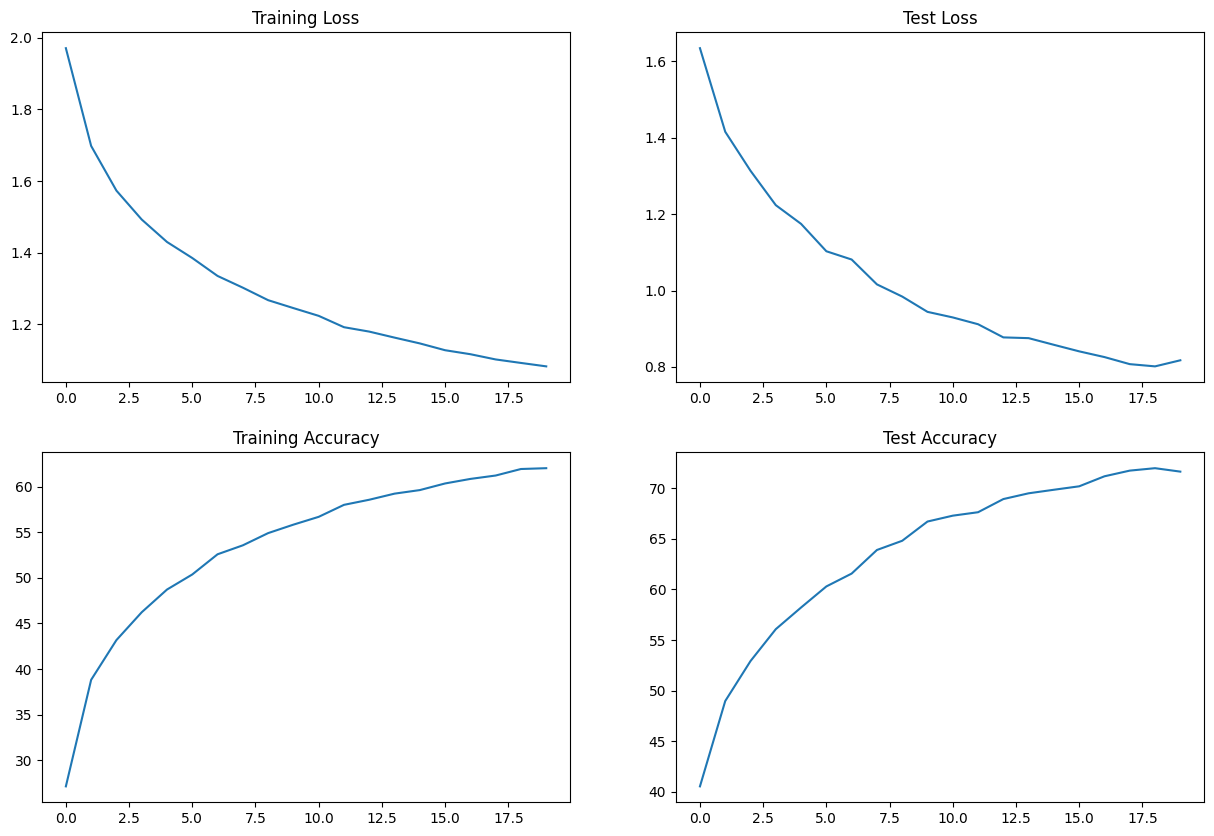

In [10]:
plot_accuracy_report(train_losses, test_losses, train_acc, test_acc)

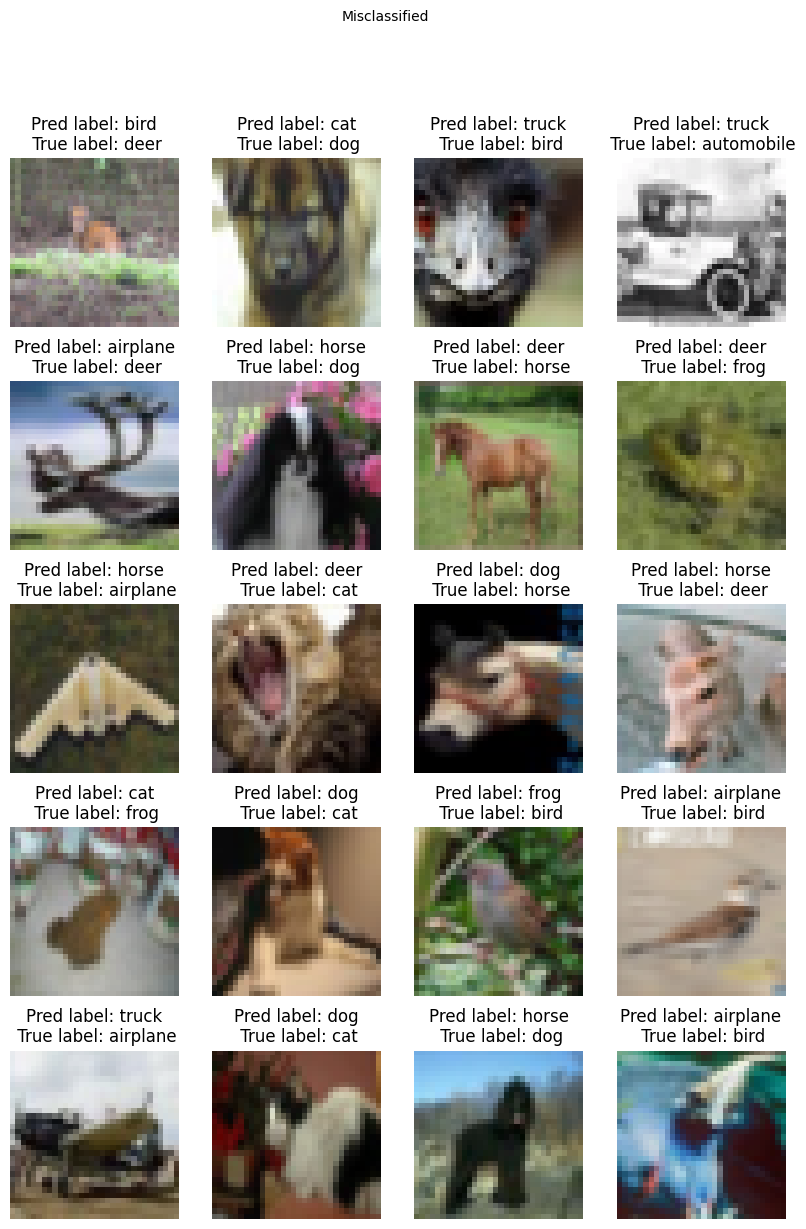

In [11]:
# from torchvision import transforms
# import matplotlib.pyplot as plt
# import numpy as np

grid_size = (4,4)
plot_misclassified(model,test_loader,test_data,device,mean,std)


Accuracy of airplane : 79 %

Accuracy of automobile : 87 %

Accuracy of  bird : 48 %

Accuracy of   cat : 52 %

Accuracy of  deer : 77 %

Accuracy of   dog : 57 %

Accuracy of  frog : 73 %

Accuracy of horse : 82 %

Accuracy of  ship : 79 %

Accuracy of truck : 74 %
{'airplane': 79.16666666666667, 'automobile': 87.17948717948718, 'bird': 48.275862068965516, 'cat': 52.5, 'deer': 77.77777777777777, 'dog': 57.534246575342465, 'frog': 73.03370786516854, 'horse': 82.05128205128206, 'ship': 79.06976744186046, 'truck': 74.66666666666667}


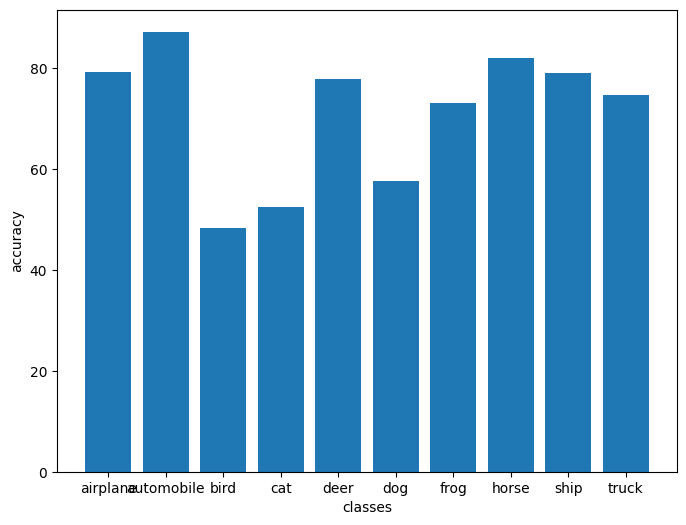

In [12]:
calculate_accuracy_per_class(model,device,test_loader,test_data)